In [33]:
#Load important LIB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#import pandas_profiling

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [34]:
train=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\traincsv.csv")
train2=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\thrusday.csv")

In [35]:
train.head()

,taken date,date of departure,no.of_days_left,Airline,Aeroplane_ID,source,destination,Dep_Time,Arrival_Time,Duration,Cruidoilprice,no_of_competitors on root,price
0,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 191,New Delhi,Bengaluru,6:20,9:00,2h 40 m,56.2,5,3732
1,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 197,New Delhi,Bengaluru,16:35,19:25,2h 50m,56.2,5,3732
2,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8719,New Delhi,Bengaluru,18:25,21:15,2h 50m,56.2,5,3732
3,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8905,New Delhi,Bengaluru,19:55,22:55,2h 30m,56.2,5,3732
4,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 143,New Delhi,Bengaluru,21:45,0:25,2h 40 m,56.2,5,4157


In [36]:
train["isWeekend"] = ((pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.dayofweek) // 5 == 1).astype(int)#doubt
train["Day_of_Week"] = pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.day_name()
train["Day_Of_Journey"] = pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.day
train["Month_of_Journey"] = pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.month

In [37]:
train.head()

,taken date,date of departure,no.of_days_left,Airline,Aeroplane_ID,source,destination,Dep_Time,Arrival_Time,Duration,Cruidoilprice,no_of_competitors on root,price,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 191,New Delhi,Bengaluru,6:20,9:00,2h 40 m,56.2,5,3732,0,Friday,1,11
1,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 197,New Delhi,Bengaluru,16:35,19:25,2h 50m,56.2,5,3732,0,Friday,1,11
2,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8719,New Delhi,Bengaluru,18:25,21:15,2h 50m,56.2,5,3732,0,Friday,1,11
3,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8905,New Delhi,Bengaluru,19:55,22:55,2h 30m,56.2,5,3732,0,Friday,1,11
4,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 143,New Delhi,Bengaluru,21:45,0:25,2h 40 m,56.2,5,4157,0,Friday,1,11


In [38]:
# cleaning duration column in train dataset
duration = list(train["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
train["Duration_minutes"] = dur_minutes
train.drop(["Duration"], axis=1, inplace = True)

In [39]:
#Cleaning Departure and Arrival Times
# Training Set
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute
train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)


In [40]:
train.head()

,taken date,date of departure,no.of_days_left,Airline,Aeroplane_ID,source,destination,Cruidoilprice,no_of_competitors on root,price,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 191,New Delhi,Bengaluru,56.2,5,3732,0,Friday,1,11,124,6,20,9,0
1,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 197,New Delhi,Bengaluru,56.2,5,3732,0,Friday,1,11,170,16,35,19,25
2,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8719,New Delhi,Bengaluru,56.2,5,3732,0,Friday,1,11,170,18,25,21,15
3,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8905,New Delhi,Bengaluru,56.2,5,3732,0,Friday,1,11,150,19,55,22,55
4,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 143,New Delhi,Bengaluru,56.2,5,4157,0,Friday,1,11,124,21,45,0,25


In [41]:
train.Day_of_Week.replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], [1,2,3,4,5,6,7], inplace=True)
train["Day_of_Week"] = train["Day_of_Week"].astype(int)

In [42]:
bins = [-1, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['late evening','magical hours','early morning','morning','early afternoon','afternoon','early evening','evening']
train['part_of_day'] = pd.cut(train['Depart_Time_Hour'], bins=bins, labels=labels)

In [43]:
train.part_of_day.replace(['late evening','magical hours','early morning','morning','early afternoon','afternoon','early evening','evening'], [6,7, 0,1, 2, 3, 4,5], inplace=True)

In [12]:
train.head()

,taken date,date of departure,no.of_days_left,Airline,Aeroplane_ID,source,destination,Cruidoilprice,no_of_competitors on root,price,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,part_of_day
0,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 191,New Delhi,Bengaluru,56.2,5,3732,0,5,1,11,124,6,20,9,0,7
1,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 197,New Delhi,Bengaluru,56.2,5,3732,0,5,1,11,170,16,35,19,25,3
2,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8719,New Delhi,Bengaluru,56.2,5,3732,0,5,1,11,170,18,25,21,15,3
3,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8905,New Delhi,Bengaluru,56.2,5,3732,0,5,1,11,150,19,55,22,55,4
4,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 143,New Delhi,Bengaluru,56.2,5,4157,0,5,1,11,124,21,45,0,25,4


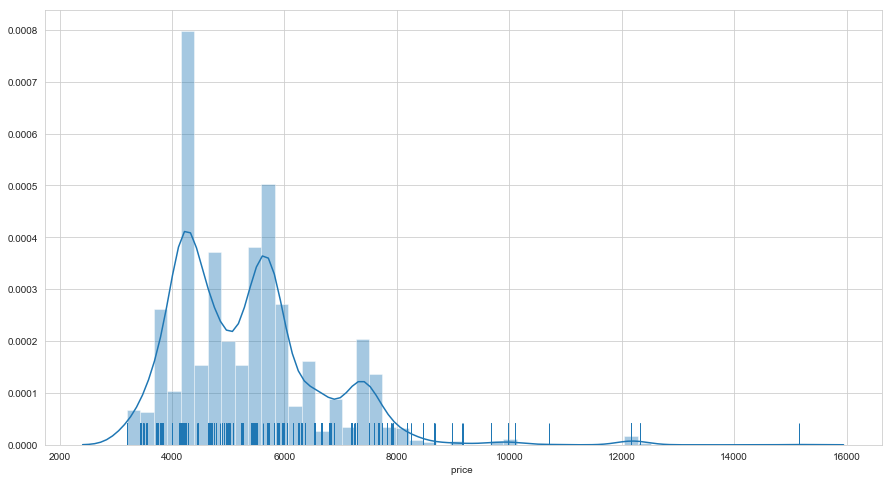

In [13]:
plt.figure(figsize=(15,8))
d1 = sns.distplot(train['price '],rug=True)

In [14]:
train['price '].dtype

dtype('int64')

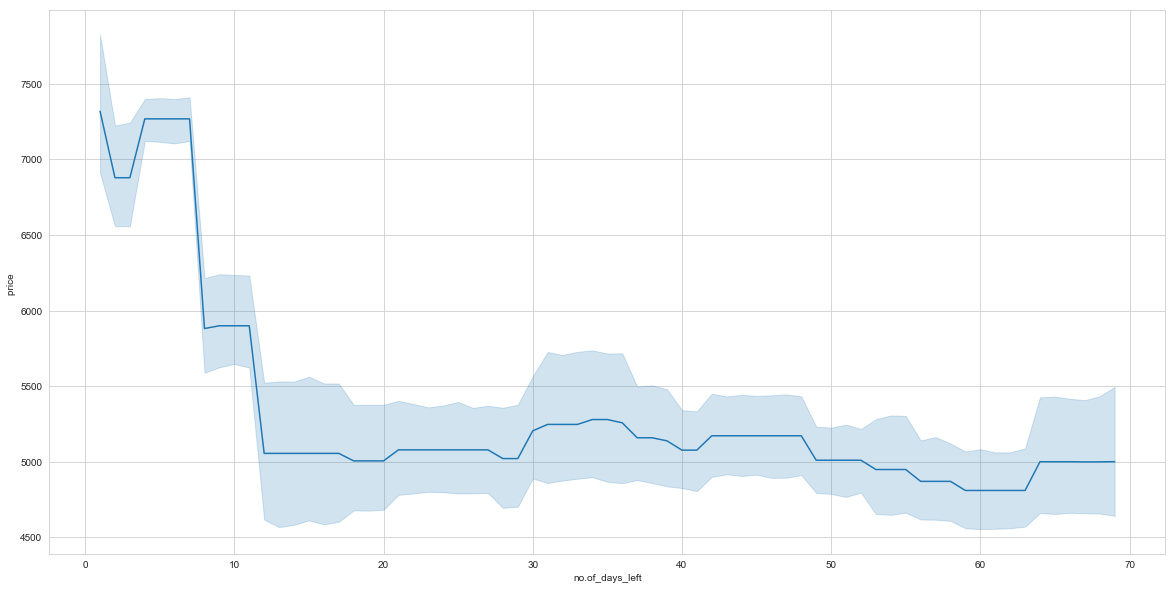

In [15]:
plt.figure(figsize=(20,10))
l1 = sns.lineplot(x=train['no.of_days_left'],y=train['price '],data=train)

In [16]:
train2.head()

,no.of_days_left,min_price
0,1,5911
1,2,5722
2,3,5722
3,4,6040
4,5,6040


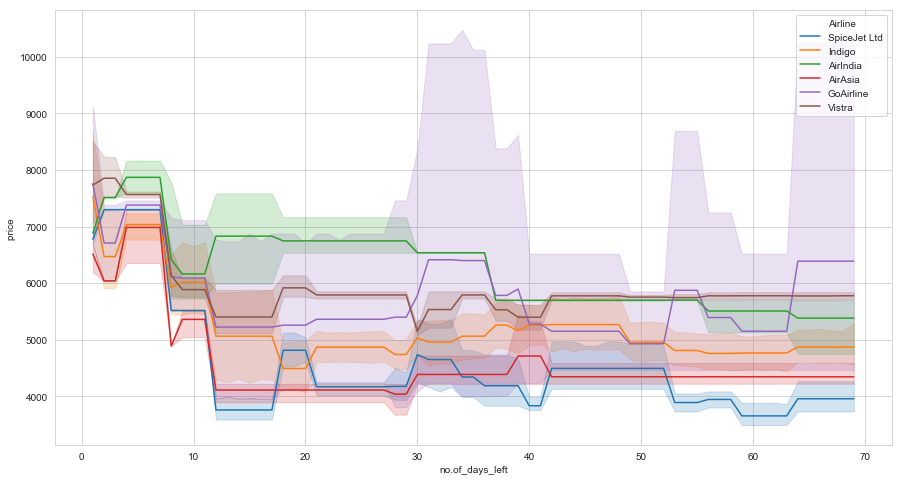

In [19]:
plt.figure(figsize=(15,8))
l1 = sns.lineplot('no.of_days_left',y=train['price '],hue='Airline',data=train)


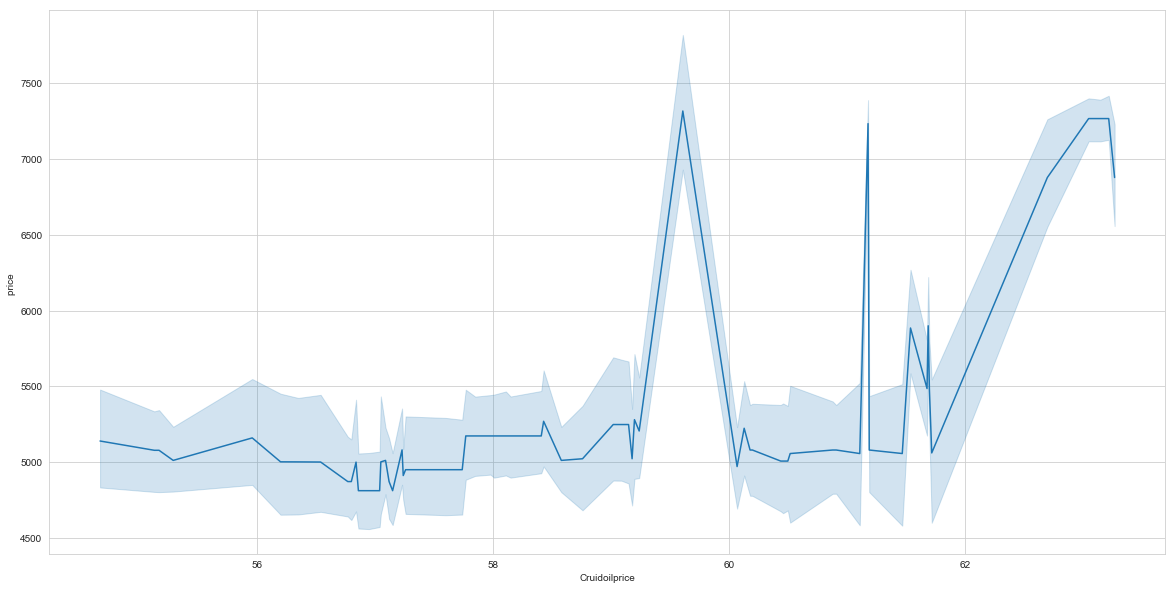

In [20]:
plt.figure(figsize=(20,10))
l1 = sns.lineplot(x=train['Cruidoilprice'],y=train['price '],data=train)

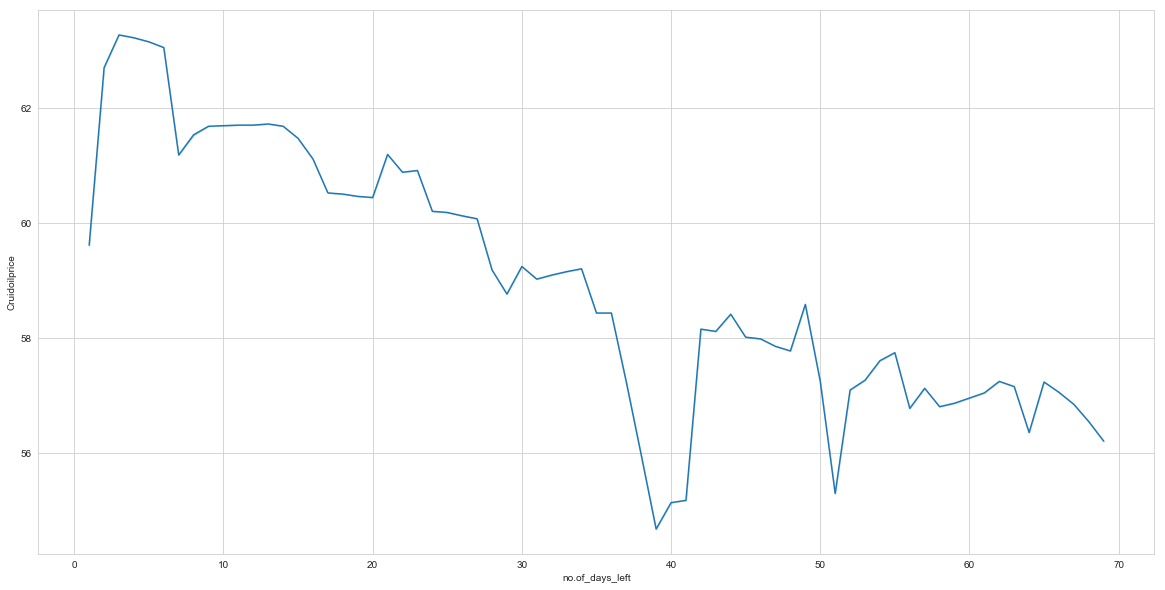

In [21]:
plt.figure(figsize=(20,10))
l1 = sns.lineplot(x=train['no.of_days_left'],y=train['Cruidoilprice'],data=train)

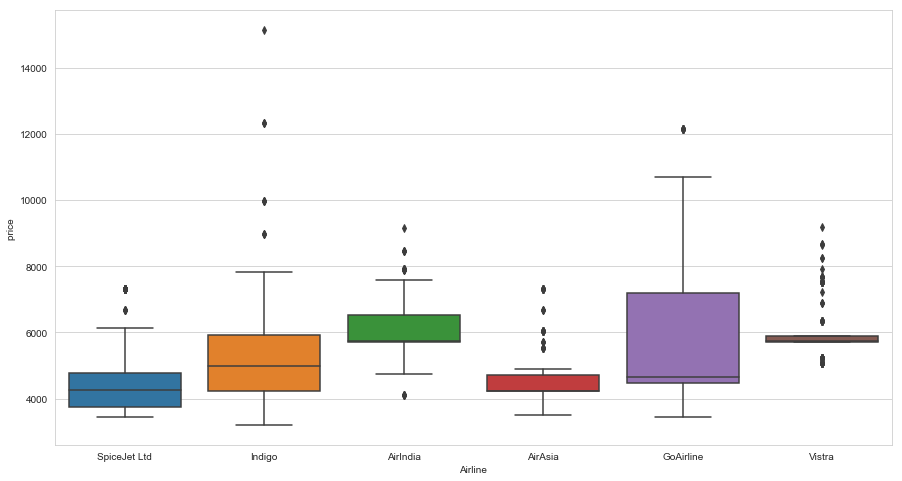

In [22]:
plt.figure(figsize=(15,8))
l1 = sns.boxplot(y='price ',x='Airline',data=train)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

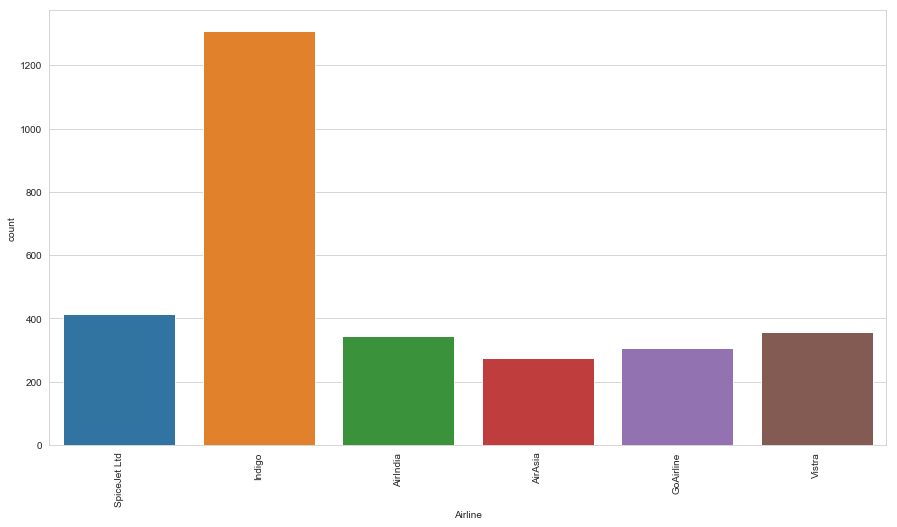

In [23]:
plt.figure(figsize=(15,8))
l1 = sns.countplot(train['Airline'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

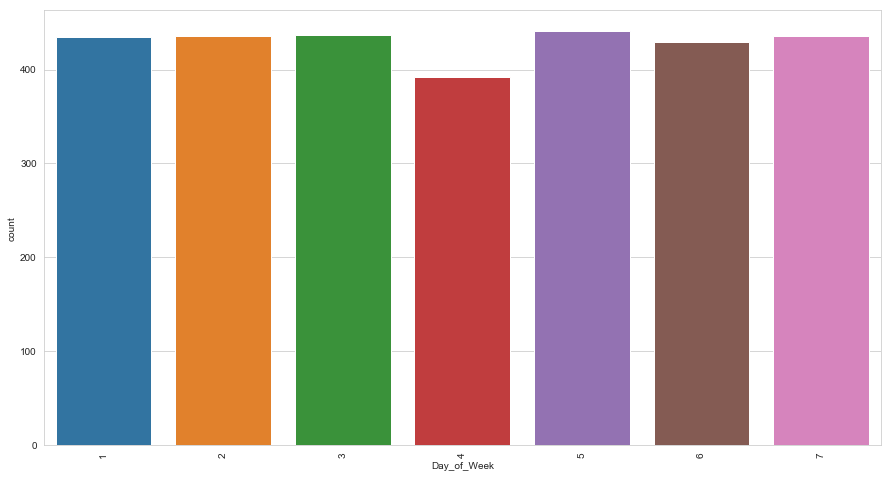

In [24]:
plt.figure(figsize=(15,8))
l1 = sns.countplot(train['Day_of_Week'])
plt.xticks(rotation=90)

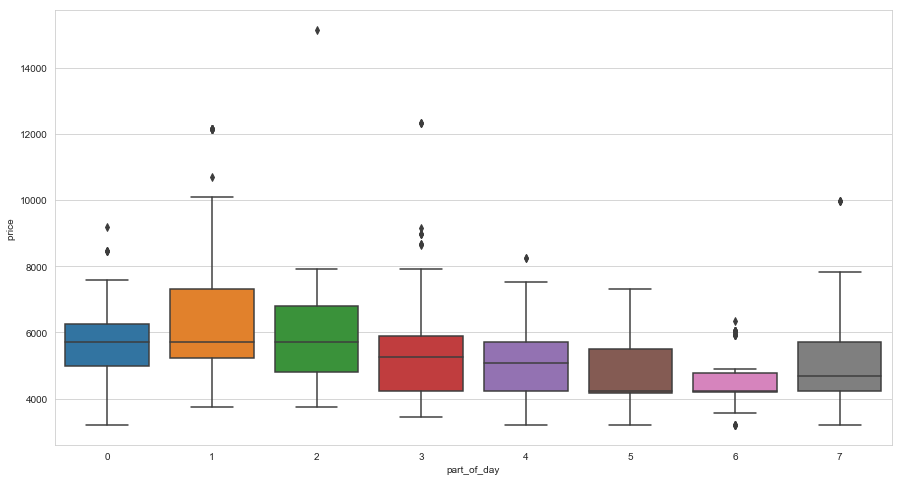

In [25]:
plt.figure(figsize=(15,8))
l1 = sns.boxplot(y='price ',x='part_of_day',data=train)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

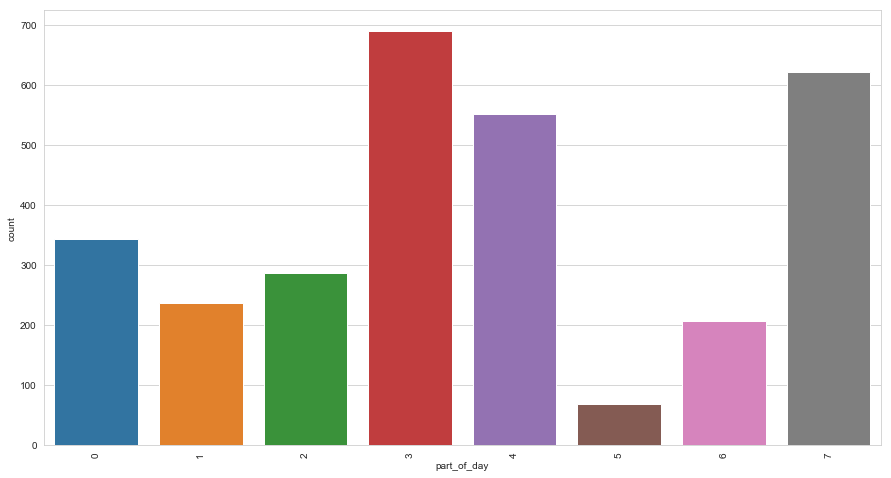

In [26]:
plt.figure(figsize=(15,8))
l1 = sns.countplot(train['part_of_day'])
plt.xticks(rotation=90)

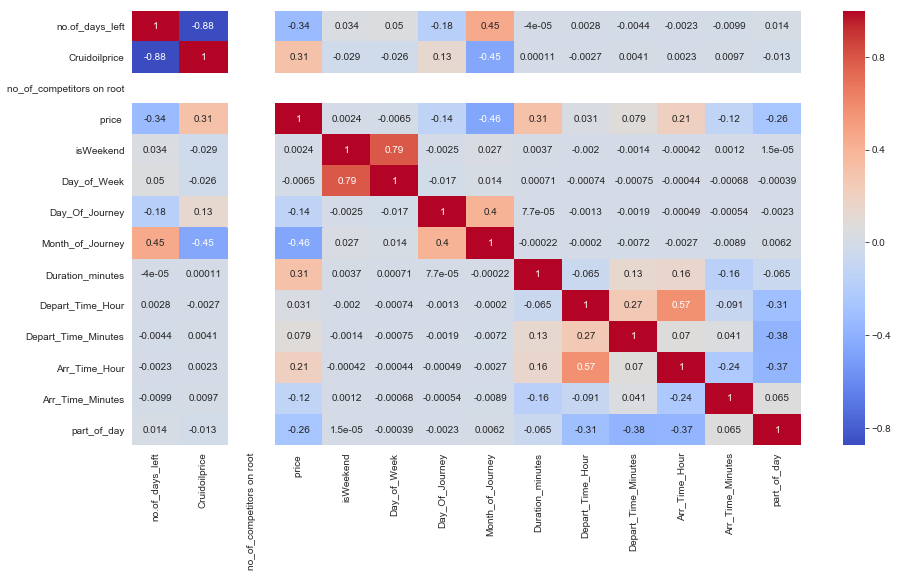

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

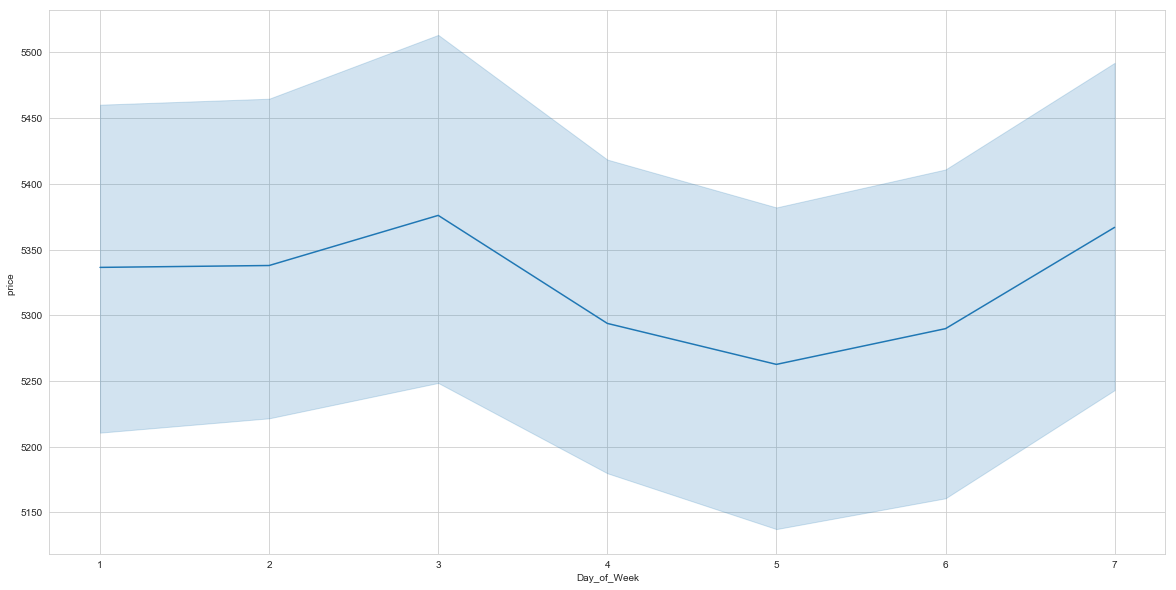

In [28]:
plt.figure(figsize=(20,10))
l1 = sns.lineplot(x=train['Day_of_Week'],y=train['price '],data=train)

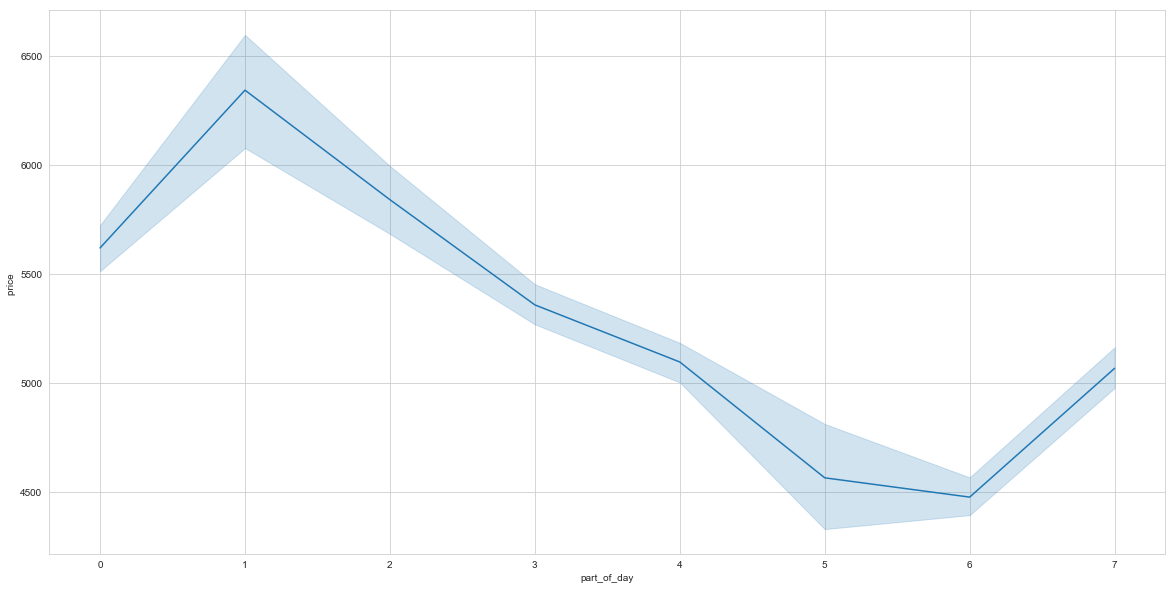

In [29]:
plt.figure(figsize=(20,10))
l1 = sns.lineplot(x=train['part_of_day'],y=train['price '],data=train)

In [30]:
train11=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\saturaday.csv")

In [31]:
train11.head()

,no.of_days_left,min_price
0,1,6554
1,2,6520
2,3,6520
3,4,6432
4,5,6355


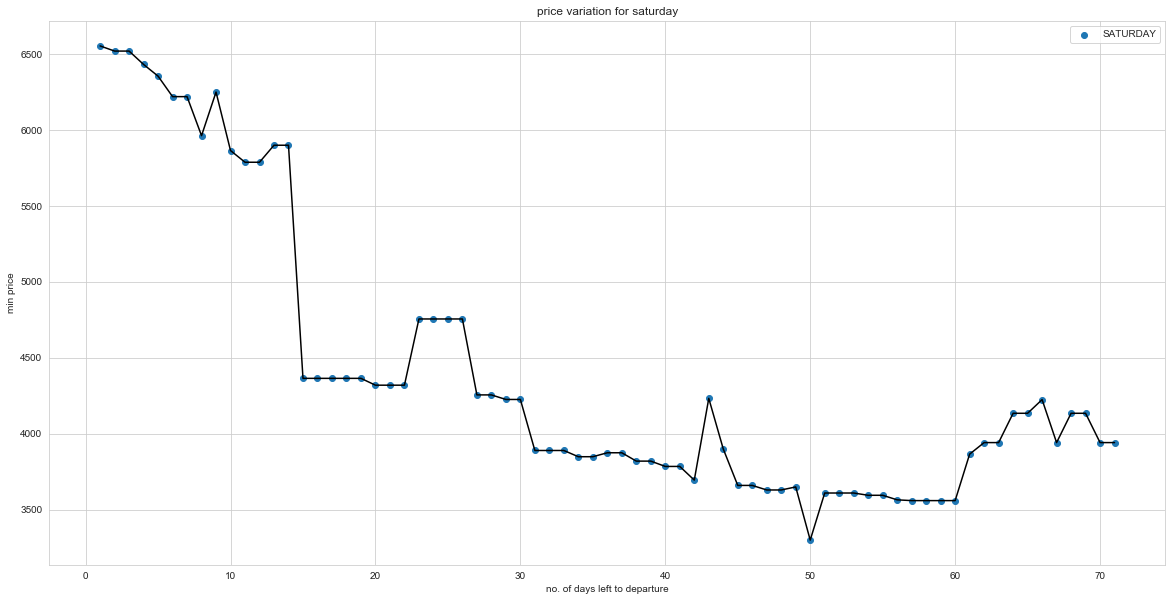

In [32]:
plt.figure(figsize=(20,10))
x1=train11['no.of_days_left']
y1=train11['min_price']
plt.scatter(x1,y1,label='SATURDAY')
plt.xlabel('no. of days left to departure')
plt.ylabel('min price')
plt.title('price variation for saturday')
plt.legend()
plt.plot(x1,y1,color='black')

In [44]:
train5=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\sunday.csv")

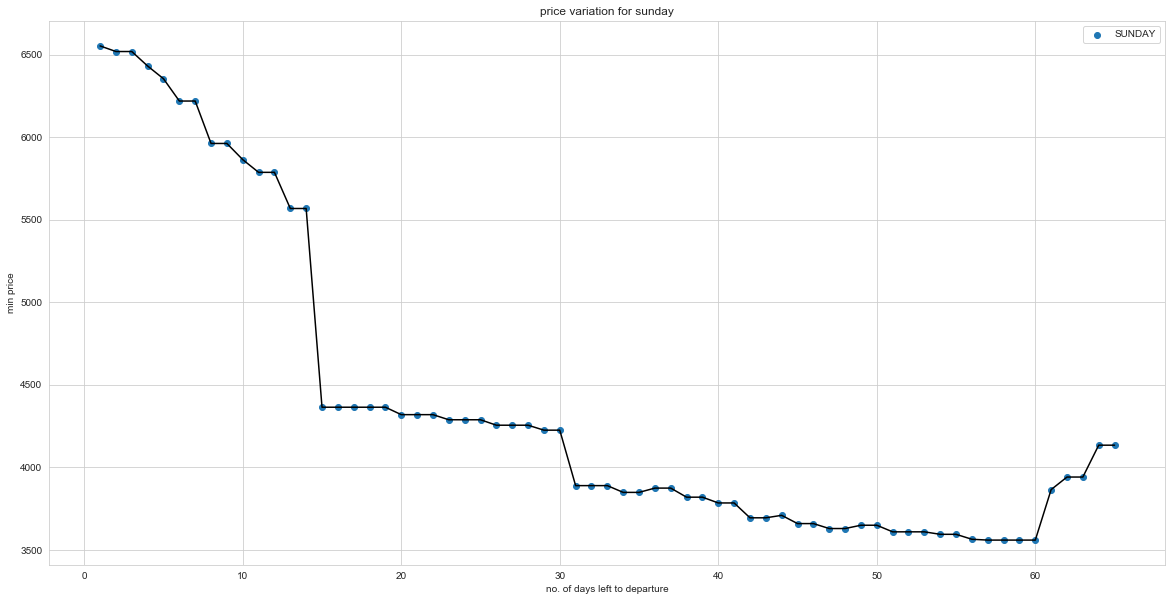

In [45]:
plt.figure(figsize=(20,10))
x1=train5['no.of_days_left']
y1=train5['min_price']
plt.scatter(x1,y1,label='SUNDAY')
plt.xlabel('no. of days left to departure')
plt.ylabel('min price')
plt.title('price variation for sunday')
plt.legend()
plt.plot(x1,y1,color='black')

In [46]:
train6=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\monday.csv")

In [47]:
train6.head()

,no.of_days_left,min_price
0,1,5911
1,2,5836
2,3,5896
3,4,6040
4,5,6040


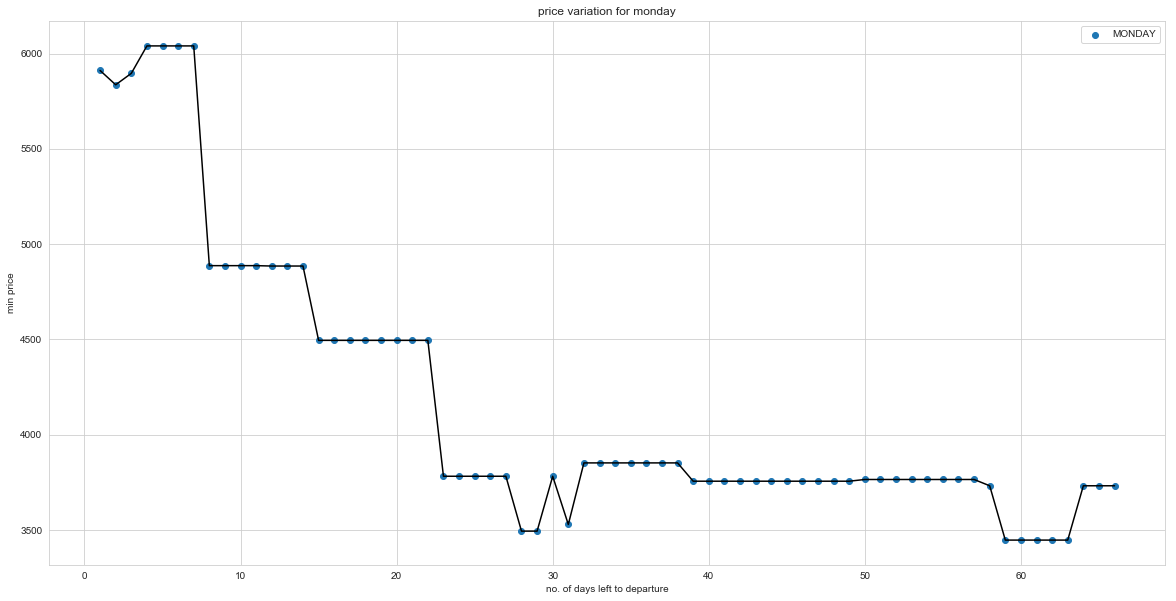

In [48]:
plt.figure(figsize=(20,10))
x1=train6['no.of_days_left']
y1=train6['min_price']
plt.scatter(x1,y1,label='MONDAY')
plt.xlabel('no. of days left to departure')
plt.ylabel('min price')
plt.title('price variation for monday')
plt.legend()
plt.plot(x1,y1,color='black')

In [49]:
train7=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\tuesday.csv")

In [50]:
train7.head()

,no.of_days_left,min_price
0,1,6350
1,2,6322
2,3,6310
3,4,6288
4,5,6288


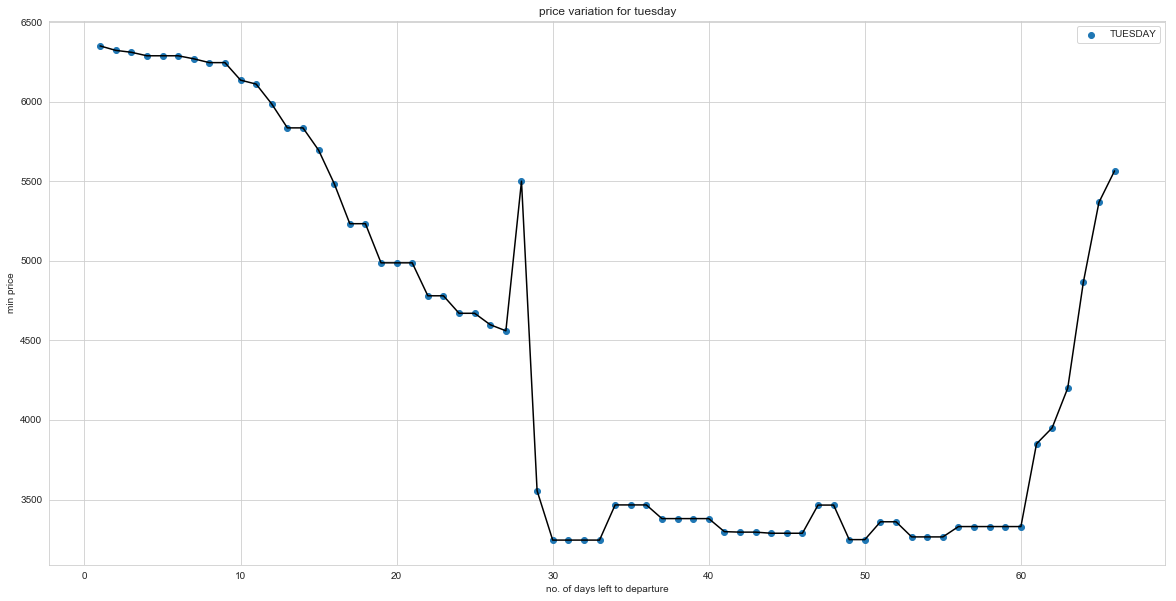

In [51]:
plt.figure(figsize=(20,10))
x1=train7['no.of_days_left']
y1=train7['min_price']
plt.scatter(x1,y1,label='TUESDAY')
plt.xlabel('no. of days left to departure')
plt.ylabel('min price')
plt.title('price variation for tuesday')
plt.legend()
plt.plot(x1,y1,color='black')

In [52]:
train8=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\wedne.csv")

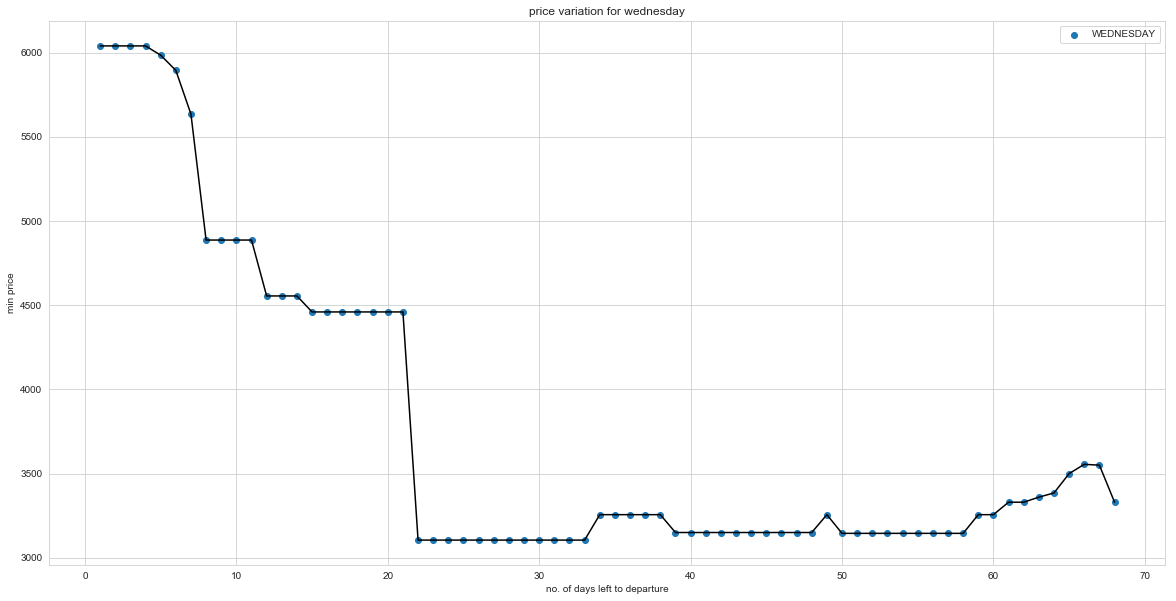

In [53]:
plt.figure(figsize=(20,10))
x1=train8['no.of_days_left']
y1=train8['min_price']
plt.scatter(x1,y1,label='WEDNESDAY')
plt.xlabel('no. of days left to departure')
plt.ylabel('min price')
plt.title('price variation for wednesday')
plt.legend()
plt.plot(x1,y1,color='black')

In [54]:
train9=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\thrusday.csv")

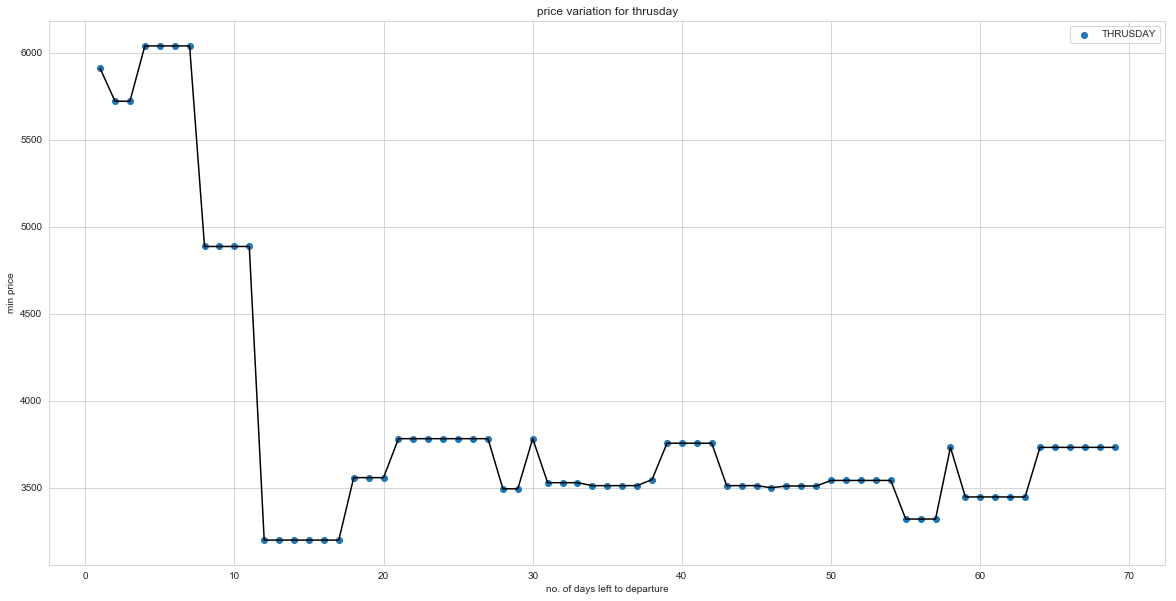

In [55]:
plt.figure(figsize=(20,10))
x1=train9['no.of_days_left']
y1=train9['min_price']
plt.scatter(x1,y1,label='THRUSDAY')
plt.xlabel('no. of days left to departure')
plt.ylabel('min price')
plt.title('price variation for thrusday')
plt.legend()
plt.plot(x1,y1,color='black')

In [56]:
train10=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\friday.csv")

In [57]:
train10.head()

,no.of_days_left,min_price
0,1,5655
1,2,5520
2,3,5320
3,4,5500
4,5,6040


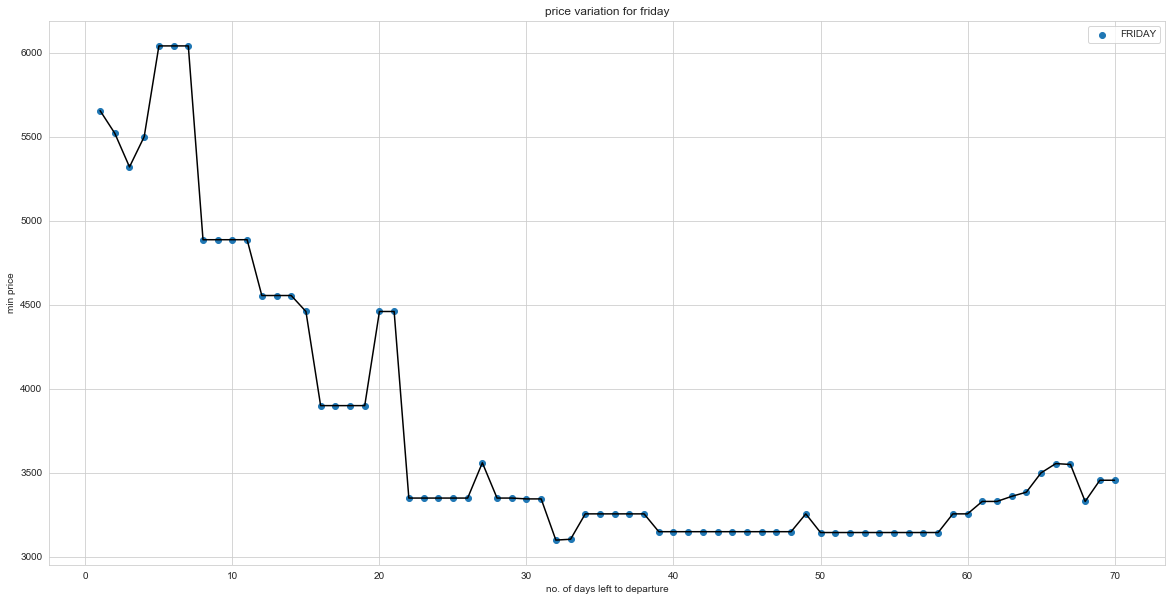

In [58]:
plt.figure(figsize=(20,10))
x1=train10['no.of_days_left']
y1=train10['min_price']
plt.scatter(x1,y1,label='FRIDAY')
plt.xlabel('no. of days left to departure')
plt.ylabel('min price')
plt.title('price variation for friday')
plt.legend()
plt.plot(x1,y1,color='black')